## Aperçu du Projet 🚀

### Problème de Classification 🍎🍌🍇

Le but de ce projet est de développer et d'évaluer plusieurs modèles d'intelligence artificielle capables de classifier des images de fruits. Les images utilisées dans ce projet sont de taille 100x100 pixels. Nous cherchons à entraîner des modèles qui peuvent reconnaître et classer différents types de fruits, tels que des pommes, des bananes, etc.

### Objectif 🎯

L'objectif principal est de comparer les performances de différents modèles de classification d'images, y compris un modèle CNN personnalisé, EfficientNet, ResNet et VGG16. Nous espérons identifier le modèle le plus performant pour la tâche de classification des fruits.

Dans ce projet, nous visons à entraîner et évaluer quatre modèles différents pour la classification d'images. Les modèles avec lesquels nous travaillons incluent :

1. **Modèle CNN Personnalisé** 🛠️
2. **EfficientNet** ⚡
3. **ResNet** 🕸️
4. **VGG16** 🏛️

### Flux de Travail 🔄

1. **Chargement et Prétraitement des Données** 📂:
    - Nous commençons par charger le jeu de données et le diviser en ensembles d'entraînement et de validation.
    - Des techniques d'augmentation des données sont appliquées pour améliorer le jeu de données d'entraînement.

2. **Création et Compilation des Modèles** 🛠️:
    - Nous définissons des fonctions pour créer et compiler chacun des quatre modèles.
    - Les modèles sont compilés avec des fonctions de perte et des optimiseurs appropriés.

3. **Entraînement des Modèles** 🏋️‍♂️:
    - Chaque modèle est entraîné sur le jeu de données d'entraînement augmenté.
    - Le processus d'entraînement inclut la surveillance des performances de validation pour éviter le surapprentissage.

4. **Évaluation** 🧪:
    - Après l'entraînement, les modèles sont évalués sur un jeu de données de test séparé.
    - Diverses métriques telles que l'exactitude, l'AUC, la précision, le rappel, le score F1 et le temps d'inférence sont calculées.

5. **Visualisation** 📊:
    - L'historique de l'entraînement et les métriques d'évaluation sont visualisés à l'aide de graphiques.
    - Des matrices de confusion sont générées pour comprendre les performances de chaque modèle.

6. **Benchmarking** 🏅:
    - Un processus de benchmarking personnalisé est mis en œuvre pour comparer les modèles en fonction de métriques pondérées.
    - Le modèle avec le score final le plus élevé est sélectionné comme le modèle le plus performant.

7. **Gestion des Artéfacts** 💾:
    - Tous les modèles et artéfacts (par exemple, les journaux d'entraînement, les graphiques) sont sauvegardés et compressés pour un partage et une analyse faciles.

### Conclusion 🎉

Le projet se conclut par la sélection du modèle le plus performant basé sur le processus de benchmarking personnalisé. Le modèle sélectionné est recommandé pour les tâches futures liées à la classification d'images.

Merci pour votre attention et votre intérêt pour ce projet ! 😊


## Récupérer les données et installer les dépendances

Pour commencer ce projet, nous devons récupérer les données et installer les dépendances nécessaires. Voici les étapes à suivre :

1. **Cloner le dépôt GitHub contenant les données** :
    - Nous allons cloner le dépôt GitHub qui contient les données nécessaires pour ce projet.
    [Lien des données](https://github.com/fruits-360/fruits-360-100x100) 🍎🍌🍇

2. **Installer les dépendances** :
    - Nous allons installer les bibliothèques Python nécessaires pour l'entraînement et l'évaluation des modèles. 🛠️📦

In [6]:
# ! git clone https://github.com/abrahamkoloboe27/Machine-Learning-En-Production-LinkedIn.git ./data
# ! pip install -U albumentations keras tensorflow opencv-python matplotlib netron

Cloning into './data'...
remote: Enumerating objects: 94441, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 94441 (delta 13), reused 17 (delta 7), pack-reused 94417 (from 1)
Receiving objects: 100% (94441/94441), 390.79 MiB | 36.24 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (94116/94116), done.


## Importer les bibliothèques nécessaires et définir les paramètres généraux du training 📚⚙️

Pour commencer, nous devons importer les bibliothèques nécessaires et définir les paramètres généraux pour l'entraînement des modèles. Voici les paramètres que nous allons utiliser :

- **image_size** : La taille des images d'entrée (100x100 pixels).
- **batch_size** : La taille des lots pour l'entraînement (128).
- **epochs** : Le nombre d'époques pour l'entraînement (10).
- **patience** : Le nombre d'époques sans amélioration avant d'arrêter l'entraînement (2).

Ces paramètres sont essentiels pour configurer correctement nos modèles et optimiser le processus d'entraînement.


In [22]:
import warnings
warnings.filterwarnings('ignore')
import albumentations as A
import cv2
import os
import random
import pandas as pd
import plotly.express as px
from PIL import Image

import logging
import keras
from keras import layers

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

import tensorflow as tf

import shutil
from tensorflow.keras.applications import EfficientNetB0, ResNet50, VGG16

import itertools
import numpy as np
import matplotlib.pyplot as plt
os.chdir("./data") # Change the working directory to the data folder

## Création des Fonctions Utiles pour la Suite 🛠️

Dans cette section, nous allons définir toutes les fonctions nécessaires pour la suite de notre projet. Ces fonctions incluront des méthodes pour charger les données, appliquer des augmentations de données, créer et compiler des modèles, entraîner les modèles, évaluer les performances des modèles, et visualiser les résultats.

### Fonctions pour le Chargement et l'Augmentation des Données 📂🔄

1. **load_data** : Charge et divise les données en ensembles d'entraînement et de validation.
2. **data_augmentation** : Applique des augmentations de données aux images d'entraînement.

### Fonctions pour la Création et la Compilation des Modèles 🛠️

1. **create_cnn_model** : Crée un modèle CNN personnalisé.
2. **create_resnet_model** : Crée un modèle ResNet.
3. **create_efficientnet_model** : Crée un modèle EfficientNet.
4. **create_vgg16_model** : Crée un modèle VGG16.
5. **compile_model** : Compile un modèle avec les paramètres d'entraînement spécifiés.

### Fonctions pour l'Entraînement et l'Évaluation des Modèles 🏋️‍♂️🧪

1. **train_model** : Entraîne un modèle et sauvegarde le meilleur modèle et le journal d'entraînement.
2. **evaluate_model** : Évalue un modèle et génère une matrice de confusion.
3. **plot_training_history** : Trace l'historique d'entraînement d'un modèle.
4. **plot_confusion_matrix** : Trace la matrice de confusion pour un modèle.

### Fonctions pour la Visualisation des Images 📊

1. **display_images_grid** : Affiche une grille d'images à partir d'un répertoire spécifié.
2. **display_images_grid_augmented** : Affiche une grille d'images augmentées à partir d'un répertoire spécifié.
3. **print_number_images_after_augmentation** : Affiche le nombre d'images avant et après l'augmentation des données.

### Fonctions pour la Gestion des Artéfacts 💾

1. **zip_directory** : Compresse le contenu d'un répertoire spécifié.

### Fonctions pour l'Évaluation sur l'Ensemble de Test 🚀

1. **evaluate_model_on_test_set** : Évalue un modèle sur l'ensemble de test et retourne un dictionnaire avec les résultats.

Ces fonctions nous permettront de structurer et d'automatiser notre flux de travail, facilitant ainsi l'entraînement, l'évaluation et la comparaison des différents modèles de classification d'images. 🚀


In [ ]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info("Importing required libraries.")

# Create directories for models and artifacts
os.makedirs("models", exist_ok=True)
os.makedirs("artefacts", exist_ok=True)
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

# Set hyperparameters
image_size = (100, 100)
batch_size = 128
epochs = 10
patience = 2

# Afficher les paramètres d'entrainement
logging.info(f"Hyperparameters: image_size={image_size}, batch_size={batch_size}, epochs={epochs}, patience={patience}")


def load_data(data_dir, validation_split=0.25, seed=1337, image_size=(100, 100), batch_size=128, label_mode='int'):
    """Load and split the data into training and validation sets."""
    logging.info(f"Loading data from {data_dir}")
    train_ds, val_ds = keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset="both",
        seed=seed,
        image_size=image_size,
        batch_size=batch_size,
        label_mode=label_mode
    )
    return train_ds, val_ds

def data_augmentation(data_dir, augmented_data_dir):
    """Apply data augmentation to the training data."""
    logging.info(f"Applying data augmentation to {data_dir}")
    transforms = [
        A.RandomRotate90(p=1.0),
        A.Transpose(p=1.0),
        A.VerticalFlip(p=1.0),
        A.HorizontalFlip(p=1.0),
        A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=1.0),
    ]

    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        augmented_class_path = os.path.join(augmented_data_dir, class_dir)

        if not os.path.exists(augmented_class_path):
            os.makedirs(augmented_class_path)

        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            original_img_path = os.path.join(augmented_class_path, img_file)
            shutil.copy(img_path, original_img_path)

            for i, transform in enumerate(transforms):
                augmented = transform(image=img)
                augmented_img = augmented['image']

                transformed_img_file = f'transformed_{i}_{img_file}'
                transformed_img_path = os.path.join(augmented_class_path, transformed_img_file)
                cv2.imwrite(transformed_img_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))

def create_cnn_model(num_classes):
    """Create a CNN model."""
    logging.info("Creating CNN model")
    model = keras.Sequential([
        layers.Input(shape=(100, 100, 3), name='input_layer'),
        layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_1'),
        layers.MaxPooling2D((2, 2), name='maxpooling2d_1'),
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
        layers.MaxPooling2D((2, 2), name='maxpooling2d_2'),
        layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_3'),
        layers.MaxPooling2D((2, 2), name='maxpooling2d_3'),
        layers.Flatten(name='flatten'),
        layers.Dense(128, activation='relu', name='dense_1'),
        layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])
    return model

def create_resnet_model(num_classes):
    """Create a ResNet model."""
    logging.info("Creating ResNet model")
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    base_model.trainable = False

    model = keras.Sequential([
        base_model,
        layers.Dense(num_classes, activation='relu', name='dense_1'),
        layers.Dropout(0.2, name='dropout_1'),
        layers.Dense(num_classes, activation='relu', name='dense_2'),
        layers.GlobalAveragePooling2D(name='global_avg_pooling'),
        layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])
    return model

def create_efficientnet_model(num_classes):
    """Create an EfficientNet model."""
    logging.info("Creating EfficientNet model")
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    base_model.trainable = False

    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(name='global_avg_pooling'),
        layers.Dense(num_classes*3, activation='relu', name='dense_1'),
        layers.BatchNormalization(name='batch_norm_1'),
        layers.Dropout(0.2, name='dropout_1'),
        layers.Dense(num_classes*2, activation='relu', name='dense_2'),
        layers.BatchNormalization(name='batch_norm_2'),
        layers.Dropout(0.2, name='dropout_2'),
        layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])
    return model

def create_vgg16_model(num_classes):
    """Create a VGG16 model."""
    logging.info("Creating VGG16 model")
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    base_model.trainable = False

    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(name='global_avg_pooling'),
        layers.Dropout(0.3, name='dropout_1'),
        layers.Dense(512, activation='relu', name='dense_1'),
        layers.BatchNormalization(name='batch_norm_1'),
        layers.Dropout(0.5, name='dropout_2'),
        layers.Dense(256, activation='relu', name='dense_2'),
        layers.BatchNormalization(name='batch_norm_2'),
        layers.Dropout(0.4, name='dropout_3'),
        layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])
    return model

def compile_model(model):
    """Compile the model."""
    logging.info("Compiling model")
    model.compile(
        optimizer=keras.optimizers.Adam(3e-4),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    return model

def train_model(model, train_ds, val_ds, model_name, epochs=2, patience=2):
    """Train the model and save the best model and training log."""
    logging.info(f"Training {model_name} model")
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            f"models/best_model_{model_name}.keras", save_best_only=True, monitor="val_acc", mode="max"
        ),
        keras.callbacks.EarlyStopping(monitor='val_acc', patience=patience, mode="max", restore_best_weights=True),
        keras.callbacks.CSVLogger(f'artefacts/training_log_{model_name}.csv')
    ]

    history = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        callbacks=callbacks
    )
    return history

def plot_training_history(history, model_name):
    """Plot training and validation accuracy and loss values."""
    logging.info(f"Plotting training history for {model_name} model")
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.savefig(f'artefacts/training_history_{model_name}.png')

def plot_confusion_matrix(cm, class_names, title='Confusion matrix', cmap=plt.cm.Blues, file_name='confusion_matrix.png'):
    """Plot the confusion matrix."""
    logging.info(f"Plotting confusion matrix for {title}")
    plt.figure(figsize=(200, 200))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({100 * cm[i, j] / cm[i, :].sum():.2f}%)',
                 horizontalalignment="center", verticalalignment='bottom',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(file_name)

def evaluate_model(model, val_ds, model_name):
    """Evaluate the model and plot the confusion matrix."""
    logging.info(f"Evaluating {model_name} model")
    y_true = []
    y_pred = []

    for images, labels in val_ds:
        y_true.extend(labels.numpy())
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))

    cm = confusion_matrix(y_true, y_pred)
    logging.info(f"Confusion matrix for {model_name}:\n{cm}")
    plot_confusion_matrix(cm, val_ds.class_names, title=f'{model_name} Confusion Matrix', file_name=f'artefacts/confusion_matrix_{model_name}.png')

    report = classification_report(y_true, y_pred, target_names=val_ds.class_names, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df.to_csv(f'artefacts/metrics_{model_name}.csv')


def display_images_grid(directory, num_rows=3, num_cols=3):
  """Displays a grid of images from a specified directory.

  Args:
    directory: The path to the directory containing the images.
    num_rows: The number of rows in the grid.
    num_cols: The number of columns in the grid.
  """
  image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
  num_images = min(len(image_files), num_rows * num_cols)

  if not image_files:
    print(f"No images found in {directory}")
    return

  fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
  axs = axs.flatten()

  for i in range(num_images):
    image_path = os.path.join(directory, random.choice(image_files))  # Choose a random image
    try:
      img = Image.open(image_path)
      axs[i].imshow(np.asarray(img))
      axs[i].axis('off')
    except Exception as e:
      print(f"Error loading image {image_path}: {e}")

  for i in range(num_images, num_rows * num_cols):
    axs[i].axis('off')

  plt.tight_layout()
  plt.show()

def display_images_grid_augmented(directory, num_rows=3, num_cols=3):
  """Displays a grid of images from a specified directory, filtering for augmented images.

  Args:
    directory: The path to the directory containing the images.
    num_rows: The number of rows in the grid.
    num_cols: The number of columns in the grid.
  """
  image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.startswith("transformed")]
  num_images = min(len(image_files), num_rows * num_cols)

  if not image_files:
    print(f"No transformed images found in {directory}")
    return

  fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
  axs = axs.flatten()

  for i in range(num_images):
    image_path = os.path.join(directory, random.choice(image_files))  # Choose a random image
    try:
      img = Image.open(image_path)
      axs[i].imshow(np.asarray(img))
      axs[i].axis('off')
    except Exception as e:
      print(f"Error loading image {image_path}: {e}")

  for i in range(num_images, num_rows * num_cols):
    axs[i].axis('off')

  plt.tight_layout()
  plt.show()

def print_number_images_after_augmentation(data_dir="data/Training", augmented_data_dir="data/train-augmented" ):
  original_image_count = 0
  augmented_image_count = 0

  for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    for img_file in os.listdir(class_path):
      original_image_count += 1


  for class_dir in os.listdir(augmented_data_dir):
    class_path = os.path.join(augmented_data_dir, class_dir)
    for img_file in os.listdir(class_path):
      augmented_image_count += 1


  print(f"Nombre d'images d'origine: {original_image_count}")
  print(f"Nombre d'images après data augmentation: {augmented_image_count}")

# Zip the directories where artifacts and models are saved
def zip_directory(directory_path, zip_path):
    """Zip the contents of a directory."""
    logging.info(f"Zipping directory {directory_path} to {zip_path}")
    shutil.make_archive(zip_path, 'zip', directory_path)

## Charger les Données et les Diviser en Ensembles d'Entraînement et de Validation 📂🔄

Pour charger les données et les diviser en ensembles d'entraînement et de validation, vous pouvez utiliser le code suivant :



In [10]:
# Load data
train_ds, val_ds = load_data("data/Training")
num_classes = len(train_ds.class_names)


Found 70491 files belonging to 141 classes.
Using 52869 files for training.
Using 17622 files for validation.


## Visualisation des Fruits 🍎🍌🍇

Dans cette section, nous allons visualiser des images de fruits. Nous allons sélectionner un dossier au hasard et afficher des photos de fruits. Chaque fois que vous exécutez cette cellule, vous verrez des images différentes.

Cela nous permet de vérifier visuellement les données et de s'assurer que les images sont correctement chargées et prétraitées.

Displaying images for data/Training/Kohlrabi 1


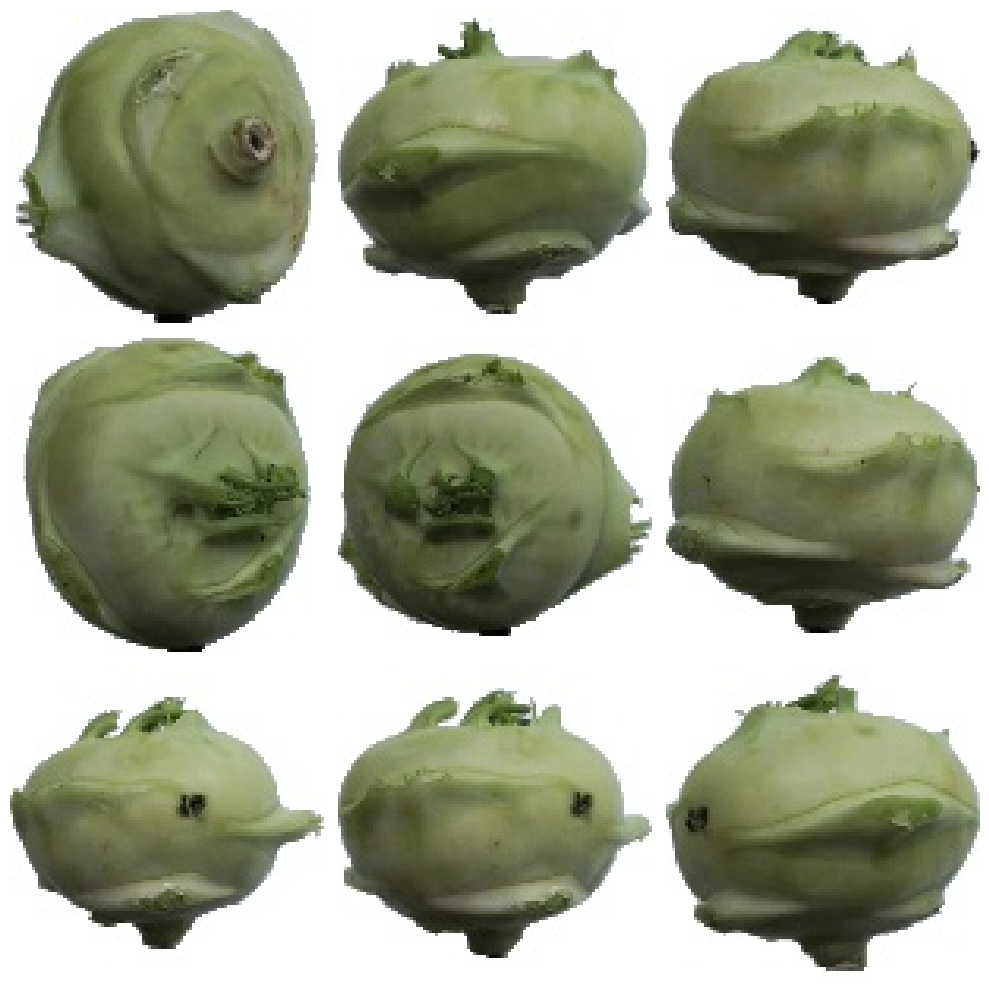

In [11]:
subdirectories = [
    os.path.join("data/Training", folder)
    for folder in os.listdir("data/Training")
    if os.path.isdir(os.path.join("data/Training", folder))
]
random.shuffle(subdirectories)  # Shuffle the list of subdirectories
for directory in subdirectories[:1]: # Display a grid for a random selection of 5 subdirectories
  print(f"Displaying images for {directory}")
  display_images_grid(directory)

## Nombre d'images par classes dans le set `train_ds` 📊

Dans cette section, nous allons afficher le nombre d'images par classe dans le jeu de données d'entraînement (`train_ds`). Cela nous permettra de visualiser la distribution des images parmi les différentes classes de fruits.

Voici le graphique représentant le nombre d'images par catégorie dans le set `train_ds` :

In [12]:
class_names = train_ds.class_names
num_classes = len(class_names)

image_counts = {}
for label in range(num_classes):
  image_counts[class_names[label]] = 0

for images, labels in train_ds:
  for label in labels.numpy():
    image_counts[class_names[label]] += 1

df_train = pd.DataFrame.from_dict(image_counts, orient='index', columns=["Nombre d'images"])
fig = px.bar(df_train, x=df_train.index, y='Nombre d\'images', title='Nombre d\'images par catégorie')
fig.show()

## Nombre d'images par classes dans le set `val_ds` 📊

Dans cette section, nous allons afficher le nombre d'images par classe dans le jeu de données de validation (`val_ds`). Cela nous permettra de visualiser la distribution des images parmi les différentes classes de fruits.

Voici le graphique représentant le nombre d'images par catégorie dans le set `val_ds` :


In [13]:
class_names = val_ds.class_names
num_classes = len(class_names)

image_counts = {}
for label in range(num_classes):
  image_counts[class_names[label]] = 0

for images, labels in val_ds:
  for label in labels.numpy():
    image_counts[class_names[label]] += 1

df_val = pd.DataFrame.from_dict(image_counts, orient='index', columns=["Nombre d'images"])
fig = px.bar(df_val, x=df_val.index, y='Nombre d\'images', title='Nombre d\'images par catégorie')
fig.show()

## Pourcentage de chaque classe dans `train_ds` et `val_ds` 📊

Dans cette section, nous allons afficher le pourcentage de chaque classe dans les ensembles de données `train_ds` et `val_ds`. Cela nous permettra de vérifier que les classes sont équilibrées dans les deux ensembles de données.

Voici le graphique représentant le pourcentage d'images par catégorie dans les sets `train_ds` et `val_ds` :

In [14]:
df_train["Pourcentage"] = df_train["Nombre d'images"] / df_train["Nombre d'images"].sum()
df_train["Train/Val"] = "Train"
df_val["Pourcentage"] = df_val["Nombre d'images"] / df_val["Nombre d'images"].sum()
df_val["Train/Val"] = "Val"
df = pd.concat([df_train, df_val])
fig = px.bar(df, x=df.index, y='Pourcentage',
             color='Train/Val',
             barmode='group',
             title='Pourcentage d\'images par catégorie')
fig.show()

## Répartition en Pourcentage par Classe

On se rend compte que la répartition en pourcentage par classe est quasi identique entre les ensembles d'entraînement et de validation. Cela signifie que nos données sont bien équilibrées, ce qui est crucial pour entraîner des modèles de classification performants.

Nous pouvons donc continuer avec les étapes suivantes de notre projet en toute confiance. 🚀

# Data Augmentation
Pour améliorer la performance de nos modèles, nous allons procéder à la data augmentation des données d'entraînement. La data augmentation permet de générer des variations des images d'entraînement, ce qui aide les modèles à généraliser mieux et à être plus robustes face aux variations des données réelles. 🚀

Nous allons utiliser des techniques telles que la rotation, la transposition, le flip horizontal et vertical, ainsi que des ajustements de luminosité et de contraste. 🍎📈

In [15]:
# Data augmentation
data_augmentation("data/Training", "data/train-augmented")
train_ds, val_ds = load_data("data/train-augmented")


Found 422946 files belonging to 141 classes.
Using 317210 files for training.
Using 105736 files for validation.


In [16]:
print_number_images_after_augmentation()

Nombre d'images d'origine: 70491
Nombre d'images après data augmentation: 422946


## Visualisation des Fruits Augmentés 🍎🍌🍇

Dans cette section, nous allons visualiser des images de fruits issues de la data augmentation. Nous allons sélectionner un dossier au hasard et afficher des photos de fruits augmentées. Chaque fois que vous exécutez cette cellule, vous verrez des images différentes.

Cela nous permet de vérifier visuellement les données augmentées et de s'assurer que les images sont correctement générées et prétraitées.

Displaying augmented images for data/train-augmented/Cherry Rainier 1


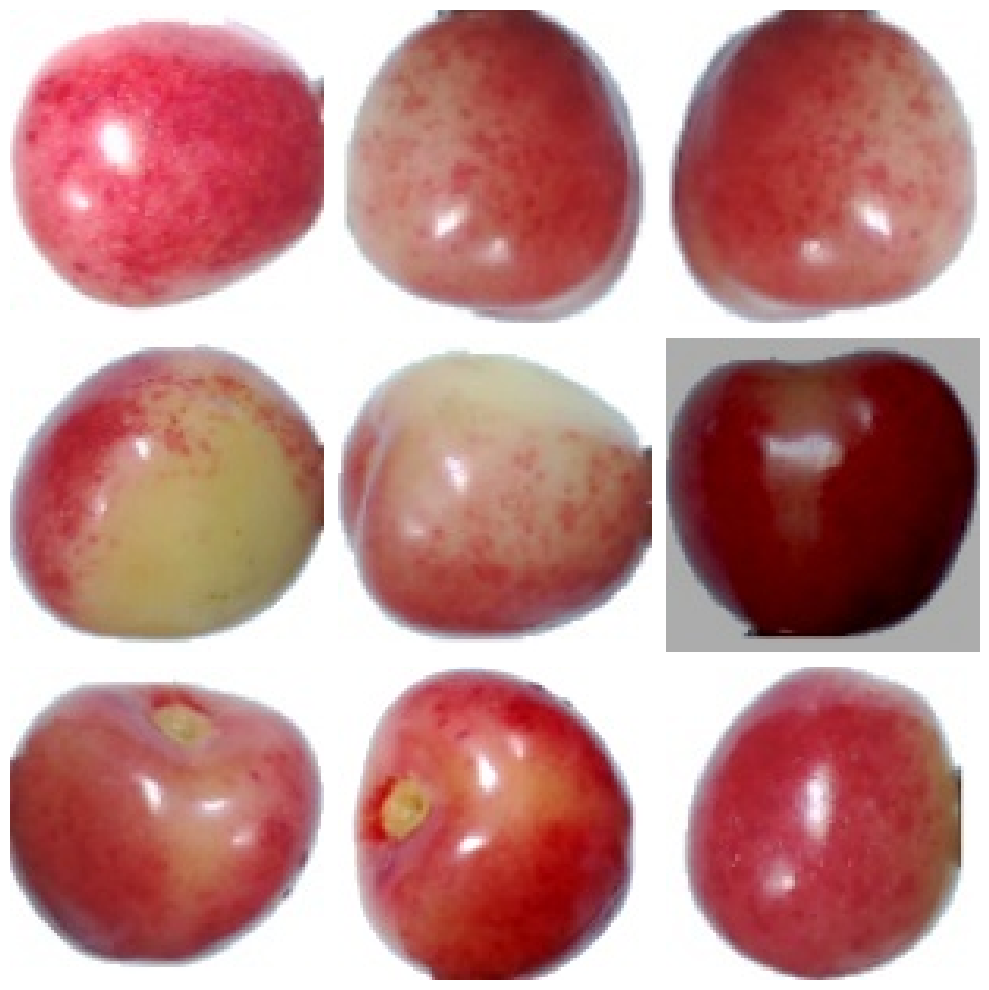

In [17]:
# Example Usage (using the augmented data directory)
subdirectories = [
    os.path.join("data/train-augmented", folder)
    for folder in os.listdir("data/train-augmented")
    if os.path.isdir(os.path.join("data/train-augmented", folder))
]
random.shuffle(subdirectories)  # Shuffle the list of subdirectories

for directory in subdirectories[:1]: # Display a grid for a random selection of 5 subdirectories
  print(f"Displaying augmented images for {directory}")
  display_images_grid_augmented(directory)

## Créer et compiler les modèles ⚙️🛠️

Pour créer et compiler les modèles, nous allons utiliser les fonctions définies précédemment.


In [18]:
# Create and compile models
cnn = create_cnn_model(num_classes)
cnn = compile_model(cnn)

resnet = create_resnet_model(num_classes)
resnet = compile_model(resnet)

efficent_net = create_efficientnet_model(num_classes)
efficent_net = compile_model(efficent_net)

vgg16 = create_vgg16_model(num_classes)
vgg16 = compile_model(vgg16)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Entrainement des modèles 🏋️‍♂️🤖
Dans cette section, nous allons entraîner plusieurs modèles, y compris un CNN personnalisé, EfficientNet, ResNet et VGG16. Le processus d'entraînement comprend les étapes suivantes :

1. **Entraînement des Modèles** 🏋️‍♂️: Nous allons entraîner chaque modèle sur le jeu de données d'entraînement. Pendant l'entraînement, nous surveillerons les performances des modèles sur le jeu de données de validation pour nous assurer qu'ils apprennent efficacement.

2. **Évaluation des Modèles** 🧪: Après l'entraînement, nous évaluerons les modèles sur le jeu de données de validation. Cette évaluation inclura le calcul de métriques telles que l'exactitude, la précision, le rappel, le score F1 et l'AUC.

3. **Visualisation des Métriques** 📊: Nous tracerons l'historique d'entraînement de chaque modèle, y compris l'exactitude et la perte au fil des époques. De plus, nous générerons et enregistrerons des matrices de confusion pour visualiser les performances des modèles sur le jeu de données de validation.

4. **Sauvegarde des Artéfacts** 💾: Tous les artéfacts, y compris les journaux d'entraînement, les graphiques d'exactitude et les matrices de confusion, seront sauvegardés dans des dossiers dédiés pour chaque modèle. Cela nous aidera à analyser et comparer les performances des modèles.

Juste après cette cellule, vous trouverez l'architecture des modèles que nous avons implémentés.


<div style="text-align: center;">
<table style="margin: auto;">
<tr>
<th>CNN Custom</th>
<th>EfficientNet</th>
<th>ResNet</th>
<th>VGG16</th>
</tr>
<tr>
<td>
<img src="images-models/svg/CNN.svg" alt="CNN Custom" width="100"/>
</td>
<td>
<img src="images-models/svg/EfficientNet-Base.svg" alt="EfficientNet" width="100"/>
</td>
<td>
<img src="images-models/svg/ResNet-Fine-Tuning.svg" alt="ResNet" width="100"/>
</td>
<td>
<img src="images-models/svg/VGG16-Fine-Tuning.svg" alt="VGG16" width="100"/>
</td>
</tr>
</table>
</div>


### Train, Plot, and Evaluate CNN Model 🚀📊

In this section, we will:

1. **Train the CNN Model** 🏋️‍♂️
2. **Plot the Training History** 📈
3. **Evaluate the Model** 🧪

Let's get started! 🎉

In [19]:
history_cnn = train_model(cnn, train_ds, val_ds, "cnn", epochs=epochs)

Epoch 1/10


I0000 00:00:1729257835.723214     134 service.cc:145] XLA service 0x7d9830005990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729257835.723276     134 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   7/2479 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - acc: 0.0112 - loss: 43.3354

I0000 00:00:1729257839.343709     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2479/2479 ━━━━━━━━━━━━━━━━━━━━ 68s 26ms/step - acc: 0.5716 - loss: 2.6378 - val_acc: 0.9559 - val_loss: 0.1536
Epoch 2/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - acc: 0.9669 - loss: 0.1144 - val_acc: 0.9757 - val_loss: 0.0800
Epoch 3/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - acc: 0.9795 - loss: 0.0692 - val_acc: 0.9852 - val_loss: 0.0513
Epoch 4/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - acc: 0.9848 - loss: 0.0504 - val_acc: 0.9897 - val_loss: 0.0348
Epoch 5/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - acc: 0.9886 - loss: 0.0388 - val_acc: 0.9915 - val_loss: 0.0304
Epoch 6/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - acc: 0.9903 - loss: 0.0330 - val_acc: 0.9877 - val_loss: 0.0452
Epoch 7/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - acc: 0.9924 - loss: 0.0251 - val_acc: 0.9905 - val_loss: 0.0347


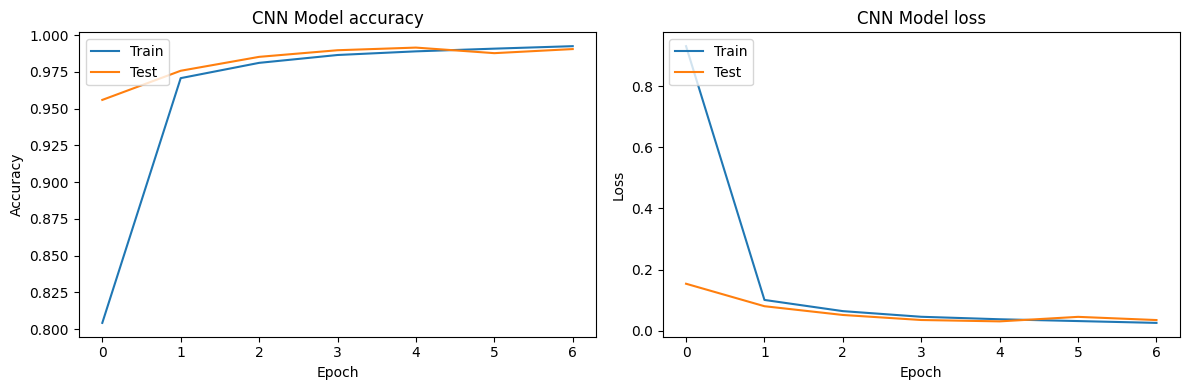

In [20]:
plot_training_history(history_cnn, "CNN")

In [ ]:
evaluate_model(cnn, val_ds, "cnn")

### Train, Plot, and Evaluate EfficientNet Model 🚀📊

In this section, we will:

1. **Train the EfficientNet Model** 🏋️‍♂️
2. **Plot the Training History** 📈
3. **Evaluate the Model** 🧪

Let's get started! 🎉

In [27]:
history_efficent_net = train_model(efficent_net, train_ds, val_ds,
                                   "efficent_net", 
                                   epochs=epochs)

Epoch 1/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 145s 46ms/step - acc: 0.8311 - loss: 0.8332 - val_acc: 0.9885 - val_loss: 0.0458
Epoch 2/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 93s 38ms/step - acc: 0.9801 - loss: 0.0803 - val_acc: 0.9920 - val_loss: 0.0298
Epoch 3/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - acc: 0.9851 - loss: 0.0576 - val_acc: 0.9932 - val_loss: 0.0261
Epoch 4/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 93s 37ms/step - acc: 0.9869 - loss: 0.0490 - val_acc: 0.9934 - val_loss: 0.0242
Epoch 5/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - acc: 0.9894 - loss: 0.0392 - val_acc: 0.9943 - val_loss: 0.0213
Epoch 7/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - acc: 0.9899 - loss: 0.0360 - val_acc: 0.9950 - val_loss: 0.0181
Epoch 8/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 93s 37ms/step - acc: 0.9913 - loss: 0.0310 - val_acc: 0.9952 - val_loss: 0.0180
Epoch 10/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - acc: 0.9915 - loss: 0.0305 - val_acc: 0.9951 - val_loss: 0.0194


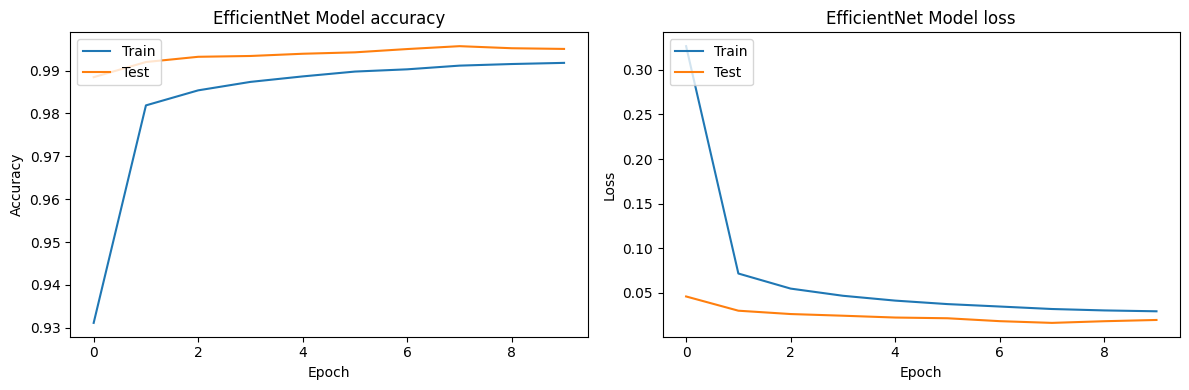

In [28]:
plot_training_history(history_efficent_net, "EfficientNet")

In [ ]:
evaluate_model(efficent_net, val_ds, "efficent_net")

## ResNet
### Train, Plot, and Evaluate ResNet Model 🚀📊

In this section, we will:

1. **Train the ResNet Model** 🏋️‍♂️
2. **Plot the Training History** 📈
3. **Evaluate the Model** 🧪

Let's get started! 🎉

In [30]:
history_resnet = train_model(resnet, 
                             train_ds, val_ds,
                             "resnet", epochs=epochs)

Epoch 1/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 179s 67ms/step - acc: 0.7715 - loss: 1.0843 - val_acc: 0.9833 - val_loss: 0.0699
Epoch 2/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 155s 63ms/step - acc: 0.9815 - loss: 0.0724 - val_acc: 0.9884 - val_loss: 0.0428
Epoch 3/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 156s 63ms/step - acc: 0.9888 - loss: 0.0417 - val_acc: 0.9916 - val_loss: 0.0292
Epoch 4/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 155s 63ms/step - acc: 0.9921 - loss: 0.0288 - val_acc: 0.9933 - val_loss: 0.0231
Epoch 5/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 155s 62ms/step - acc: 0.9939 - loss: 0.0216 - val_acc: 0.9937 - val_loss: 0.0222
Epoch 6/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 203s 63ms/step - acc: 0.9951 - loss: 0.0172 - val_acc: 0.9935 - val_loss: 0.0219
Epoch 7/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 155s 62ms/step - acc: 0.9962 - loss: 0.0139 - val_acc: 0.9945 - val_loss: 0.0185
Epoch 8/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 155s 62ms/step - acc: 0.9965 - loss: 0.0117 - val_acc: 0.9949 - val_loss: 0.0172
Epoch 9/10
2479/

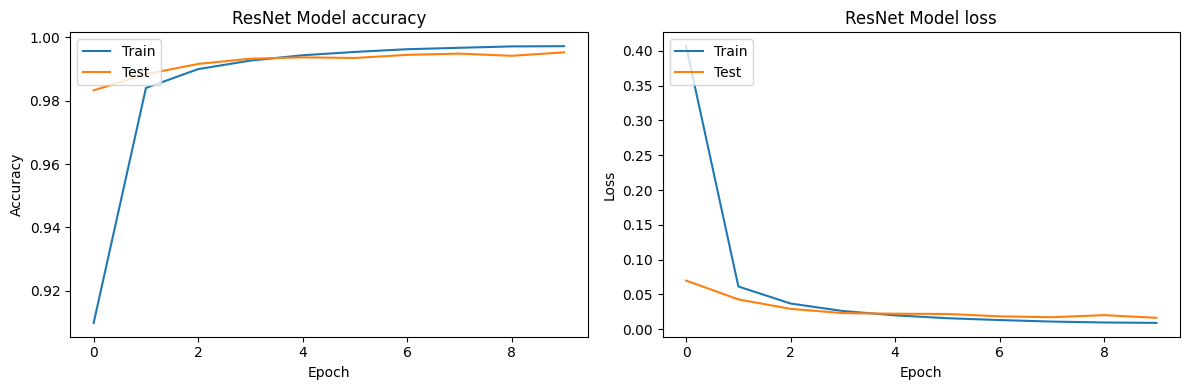

In [31]:
plot_training_history(history_resnet, "ResNet")

In [ ]:
evaluate_model(resnet, val_ds, "resnet")

### Train, Plot, and Evaluate VGG16 Model 🚀📊

In this section, we will:

1. **Train the VGG16 Model** 🏋️‍♂️
2. **Plot the Training History** 📈
3. **Evaluate the Model** 🧪

Let's get started! 🎉


In [ ]:
history_vgg16 = train_model(vgg16, train_ds, val_ds, "vgg16", epochs=epochs)

Epoch 1/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 198s 77ms/step - acc: 0.3787 - loss: 2.7508 - val_acc: 0.9354 - val_loss: 0.2891
Epoch 2/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 185s 75ms/step - acc: 0.7786 - loss: 0.7595 - val_acc: 0.9614 - val_loss: 0.1580
Epoch 3/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 185s 75ms/step - acc: 0.8390 - loss: 0.5395 - val_acc: 0.9710 - val_loss: 0.1147
Epoch 4/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 185s 75ms/step - acc: 0.8631 - loss: 0.4532 - val_acc: 0.9762 - val_loss: 0.0934
Epoch 5/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 185s 75ms/step - acc: 0.8796 - loss: 0.4009 - val_acc: 0.9794 - val_loss: 0.0802
Epoch 6/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 185s 75ms/step - acc: 0.8885 - loss: 0.3679 - val_acc: 0.9811 - val_loss: 0.0740
Epoch 7/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 185s 75ms/step - acc: 0.8964 - loss: 0.3407 - val_acc: 0.9836 - val_loss: 0.0651
Epoch 8/10
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 185s 75ms/step - acc: 0.8998 - loss: 0.3282 - val_acc: 0.9846 - val_loss: 0.0601
Epoch 9/10
2478/

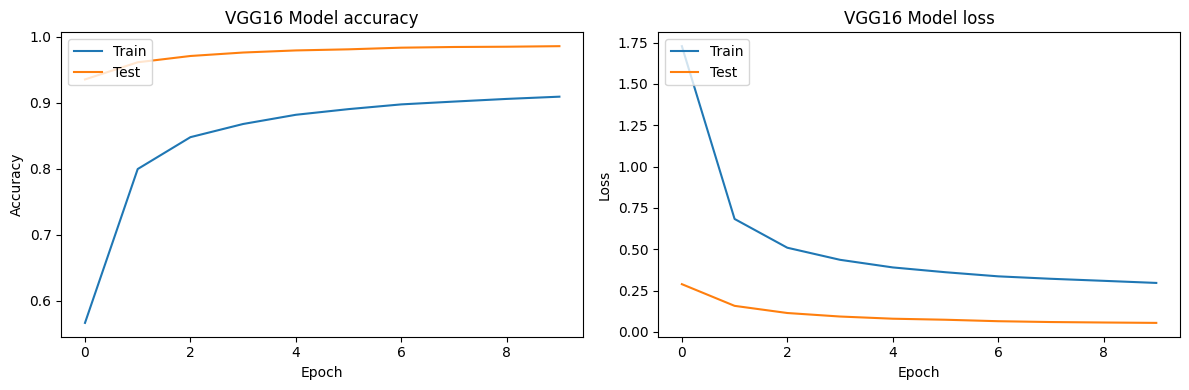

In [40]:
plot_training_history(history_vgg16, "VGG16")

In [ ]:
evaluate_model(vgg16, val_ds, "vgg16")

## Ziper les Artéfacts et les Dossiers Modèles 📦

Dans cette section, nous allons compresser les répertoires contenant les modèles et les artefacts générés lors de l'entraînement et de l'évaluation des modèles. Cela nous permettra de sauvegarder et de partager facilement les résultats de notre travail.

Les répertoires suivants seront compressés :
- `models` : Contient les modèles entraînés.
- `artefacts` : Contient les artefacts générés, tels que les graphiques et les logs.

In [43]:
# Zip the 'models' and 'artefacts' directories
zip_directory('models', 'models')
zip_directory('artefacts', 'artefacts')

## Évaluation des Modèles 🚀

Dans cette section, nous allons évaluer tous les modèles que nous avons sauvegardés lors de la phase d'entraînement. Voici les étapes détaillées de notre processus d'évaluation :

1. **Chargement des Modèles et des Ensembles de Test** 📥 :
    - Nous allons commencer par charger tous les modèles que nous avons sauvegardés précédemment.
    - Ensuite, nous chargerons les ensembles de données de test qui n'ont jamais été vus par les modèles.

2. **Calcul des Métriques d'Évaluation** 📊 :
    - Pour chaque modèle, nous calculerons les métriques suivantes : Accuracy, AUC, Précision, Rappel, F1 Score et le Temps d'inférence moyen.
    - Ces métriques nous permettront de mesurer les performances des modèles sur les données de test.

3. **Affichage d'une Prédiction Aléatoire** 🎲 :
    - Après chaque évaluation, nous afficherons une prédiction aléatoire sur une image du jeu de données de test. Cela nous permettra de visualiser les performances des modèles sur des exemples concrets.

4. **Benchmarking et Calcul d'une Métrique Personnalisée** 🏅 :
    - Avant de comparer les modèles, nous effectuerons un benchmarking en assignant des coefficients à chaque métrique.
    - Nous calculerons une métrique personnalisée ou finale en combinant les différentes métriques pondérées par leurs coefficients respectifs.

5. **Sélection du Modèle Optimal** 🏆 :
    - En utilisant la métrique personnalisée, nous réévaluerons les modèles.
    - Le modèle ayant la meilleure performance selon cette métrique sera sélectionné comme le modèle le plus adapté à nos besoins.

Ce processus nous permettra de déterminer de manière rigoureuse et objective quel modèle est le plus performant pour la reconnaissance des fruits. 🍎🍌🍇

In [36]:
import keras 
import time
import pandas as pd
import logging
import random
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

def evaluate_model_on_test_set(model, test_ds, model_name):
    """Evaluate the model on the test set and return a dictionary with the results."""
    logging.info(f"Evaluating {model_name} model on the test set")
    y_true = []
    y_pred = []
    y_pred_proba = []
    inference_times = []

    for images, labels in test_ds:
        start_time = time.time()
        predictions = model.predict(images)
        inference_time = time.time() - start_time
        inference_times.append(inference_time)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(predictions, axis=1))
        y_pred_proba.extend(predictions)

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
    mean_inference_time = np.mean(inference_times)

    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'auc': auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mean_inference_time': mean_inference_time
    }
    pd.DataFrame([results]).to_csv(f'evaluation-test/test_results_{model_name}.csv', index=False)
    
def display_random_image_with_prediction(model, test_ds):
    # Get a random batch of images and labels from the test dataset
    for images, labels in test_ds.take(1):
        # Choose a random index from the batch
        idx = random.randint(0, images.shape[0] - 1)
        image = images[idx].numpy().astype("uint8")
        true_label = labels[idx].numpy()
        
        # Get the model's prediction for the image
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(prediction, axis=1)[0]
        
        # Get the class names
        class_names = test_ds.class_names
        
        # Determine the color for the text (green if correct, red if incorrect)
        color = "green" if predicted_label == true_label else "red"
        
        # Display the image
        plt.imshow(image)
        plt.title(f"True: {class_names[true_label]}, Pred: {class_names[predicted_label]}", color=color)
        plt.axis("off")
        plt.show()



## Chargement des Données Test 📂

Dans cette section, nous allons charger les données de test. Ces données n'ont jamais été vues par les modèles pendant l'entraînement et la validation. Elles nous permettront d'évaluer les performances réelles des modèles sur des données inédites.

Nous utiliserons les paramètres suivants pour le chargement des données :
- **image_size** : La taille des images d'entrée (100x100 pixels).
- **batch_size** : La taille des lots pour l'évaluation (128).

Voici le code pour charger les données de test :


In [34]:
test_ds = keras.utils.image_dataset_from_directory(
    'data/Test',
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int'
)

Found 23619 files belonging to 141 classes.


## Modèle CNN Personnalisé 🛠️

In [35]:
best_cnn = keras.models.load_model('models/best_model_cnn.keras')
evaluate_model_on_test_set(best_cnn, test_ds, 'cnn')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


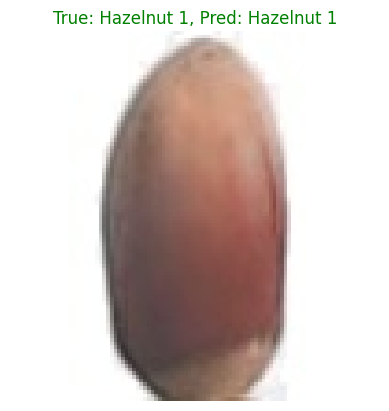

In [64]:
display_random_image_with_prediction(best_cnn, test_ds)

## Modèle ResNet 🕸️

In [65]:
best_resnet = keras.models.load_model('models/best_model_resnet.keras')
evaluate_model_on_test_set(best_resnet, test_ds, 'resnet')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


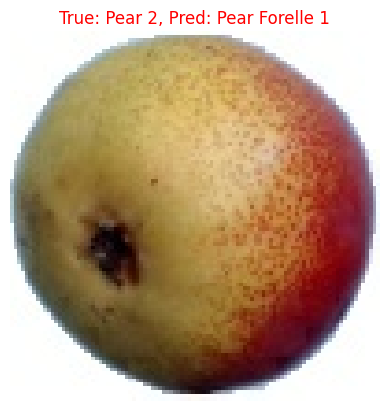

In [71]:
display_random_image_with_prediction(best_resnet, test_ds)

## Modèle EfficientNet ⚡

In [72]:
best_efficient_net = keras.models.load_model('models/best_model_efficent_net.keras')
evaluate_model_on_test_set(best_efficient_net, test_ds, 'efficent_net')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


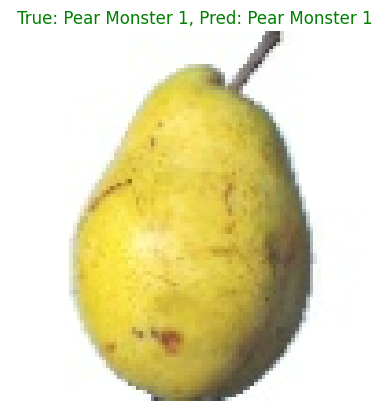

In [73]:
display_random_image_with_prediction(best_resnet, test_ds)

## Modèle VGG16 🏛️

In [74]:
best_vgg16 = keras.models.load_model('models/best_model_vgg16.keras')
evaluate_model_on_test_set(best_vgg16, test_ds, 'vgg16')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


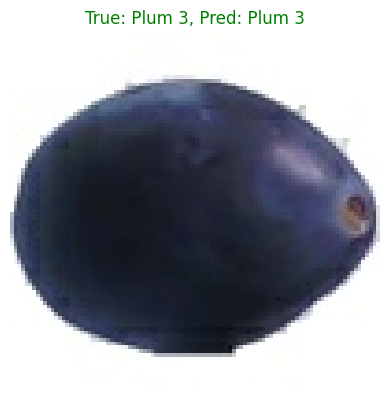

In [75]:
display_random_image_with_prediction(best_resnet, test_ds)

## Chargement et Visualisation des Métriques Calculées 📊

Dans cette section, nous allons charger les métriques calculées lors des évaluations des modèles et les afficher sous forme de graphiques. Cela nous permettra de comparer visuellement les performances des différents modèles sur plusieurs métriques.

Les métriques que nous allons visualiser sont les suivantes :
- Accuracy 🎯
- AUC 📈
- Précision 🧮
- Rappel 🔍
- F1 🏆
- Temps d'inférence moyen ⏱️

Nous utiliserons des barplots pour représenter ces métriques pour chaque modèle.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df_cnn = pd.read_csv('evaluation-test/test_results_cnn.csv')
df_resnet = pd.read_csv('evaluation-test/test_results_resnet.csv')
df_efficient_net = pd.read_csv('evaluation-test/test_results_efficent_net.csv')
df_vgg16 = pd.read_csv('evaluation-test/test_results_vgg16.csv')
df  = pd.concat([df_cnn, df_resnet, df_efficient_net, df_vgg16])
df.rename(columns={'model_name': 'Modèle', 'accuracy': 'Accuracy',
                   'auc': 'AUC', 'precision': 'Précision', 'recall': 'Rappel', 'f1': 'F1', 
                   'mean_inference_time': 'Temps d\'inférence moyen'}, inplace=True)
df

,Modèle,Accuracy,AUC,Précision,Rappel,F1,Temps d'inférence moyen
0,cnn,0.963165,0.999857,0.969011,0.963165,0.962015,0.198538
0,resnet,0.977518,0.999943,0.980242,0.977518,0.976851,1.069916
0,efficent_net,0.932935,0.999624,0.946242,0.932935,0.931973,4.508988
0,vgg16,0.952581,0.999795,0.958135,0.952581,0.951071,3.044420


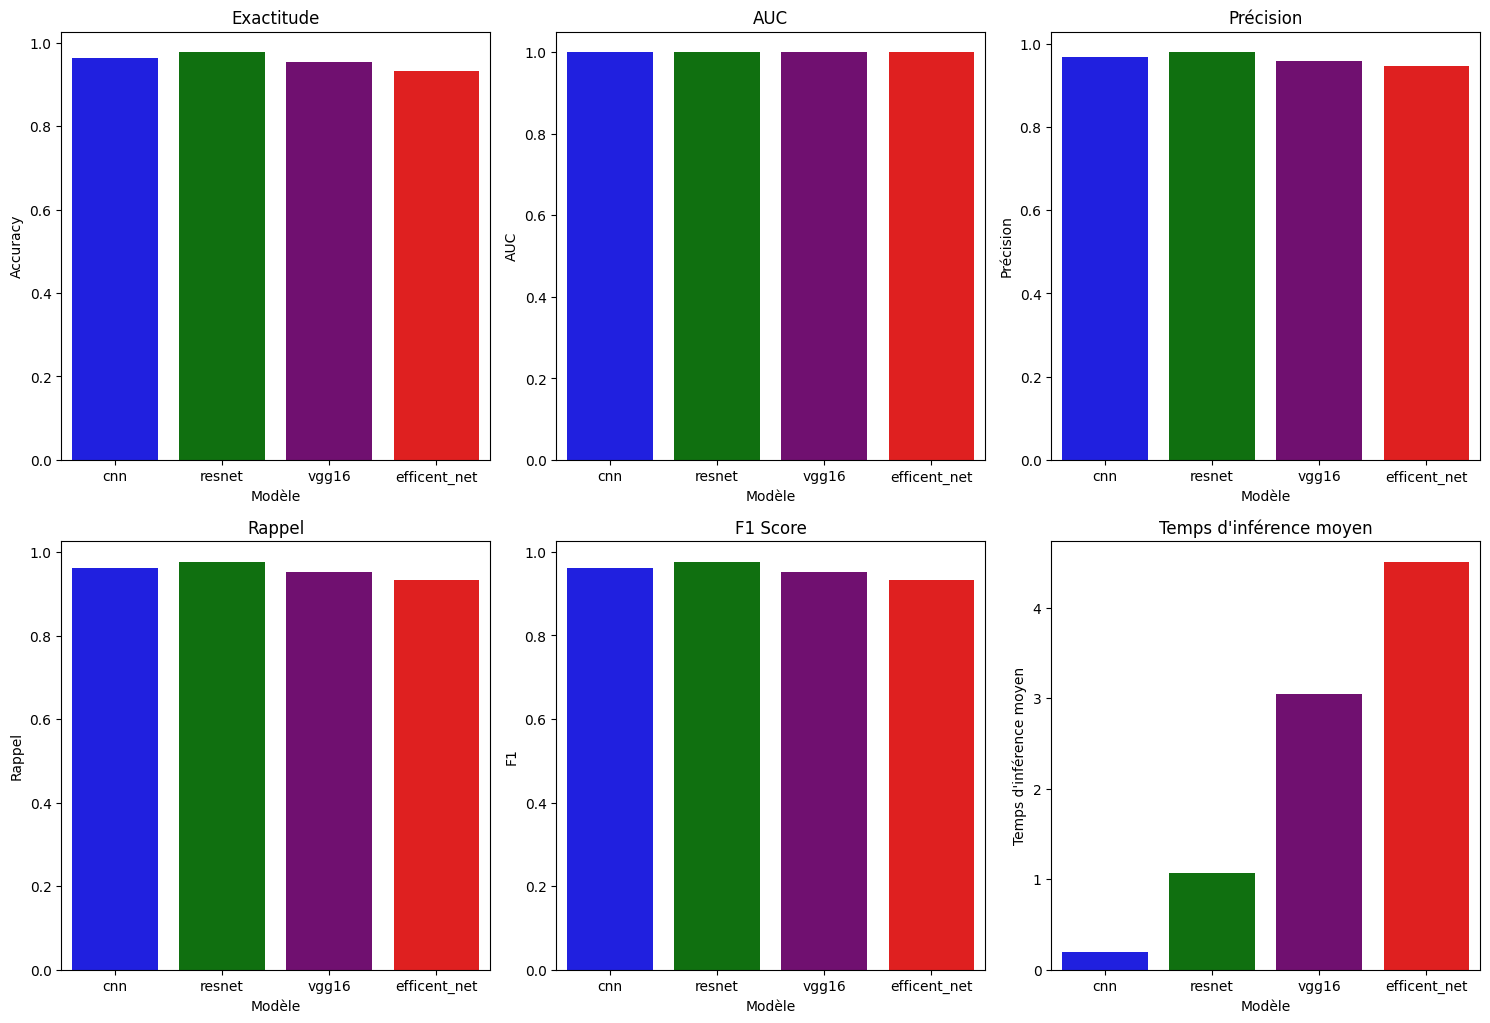

In [12]:
# Définir les couleurs pour chaque modèle
colors = {
    'cnn': 'blue',
    'resnet': 'green',
    'efficent_net': 'red',
    'vgg16': 'purple'
}

# Définir les métriques à tracer
metrics = ['Accuracy', 'AUC', 'Précision', 'Rappel', 'F1', 'Temps d\'inférence moyen']
titles = ['Exactitude', 'AUC', 'Précision', 'Rappel', 'F1 Score', 'Temps d\'inférence moyen']

# Trier les métriques dans l'ordre décroissant, sauf pour le temps d'inférence
df_sorted = df.copy()
for metric in metrics:
    if metric != "Temps d'inférence moyen":
        df_sorted = df_sorted.sort_values(by=metric, ascending=False)
    else:
        df_sorted = df_sorted.sort_values(by=metric, ascending=True)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    sns.barplot(x='Modèle', y=metric, data=df_sorted, ax=axs[row, col], palette=colors)
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Modèle')
    axs[row, col].set_ylabel(metric)

# Supprimer les axes inutilisés
for i in range(len(metrics), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

## Benchmarking des Modèles 📊

Pour évaluer les performances des différents modèles, nous avons attribué des coefficients à chaque métrique et calculé un score final pour chaque modèle. Voici les coefficients utilisés pour chaque métrique :

| Métrique                  | Coefficient |
|---------------------------|-------------|
| Accuracy 🎯               | 0.4         |
| AUC 📈                    | 0.1         |
| Précision 🧮              | 0.1         |
| Rappel 🔍                 | 0.1         |
| F1 🏆                     | 0.1         |
| Temps d'inférence moyen ⏱️ | 0.2         |


In [29]:
# Définir les coefficients pour chaque métrique
coefficients = {
    'Accuracy': 0.3,
    'AUC': 0.1,
    'Précision': 0.1,
    'Rappel': 0.1,
    'F1': 0.1,
    "Temps d'inférence moyen": 0.3  # Augmenter le poids du temps d'inférence moyen
}

# Normaliser les métriques pour qu'elles soient sur la même échelle
df_normalized = df.copy()
for metric in metrics:
    if metric != "Temps d'inférence moyen":
        df_normalized[metric] = df[metric] / df[metric].max()
    else:
        df_normalized[metric] = df[metric].min() / df[metric]

# Calculer le score final pour chaque modèle
df_normalized['Score final'] = 0
for metric in metrics:
    df_normalized['Score final'] += df_normalized[metric] * coefficients[metric]

# Afficher les scores finaux
df_normalized = df_normalized.sort_values(by='Score final', ascending=False)
df_normalized

,Modèle,Accuracy,AUC,Précision,Rappel,F1,Temps d'inférence moyen,Score final
0,cnn,0.985317,0.999915,0.988543,0.985317,0.984813,1.000000,0.991454
0,resnet,1.000000,1.000000,1.000000,1.000000,1.000000,0.185564,0.755669
0,vgg16,0.974489,0.999853,0.977447,0.974489,0.973609,0.065214,0.704451
0,efficent_net,0.954392,0.999682,0.965315,0.954392,0.954058,0.044032,0.686872


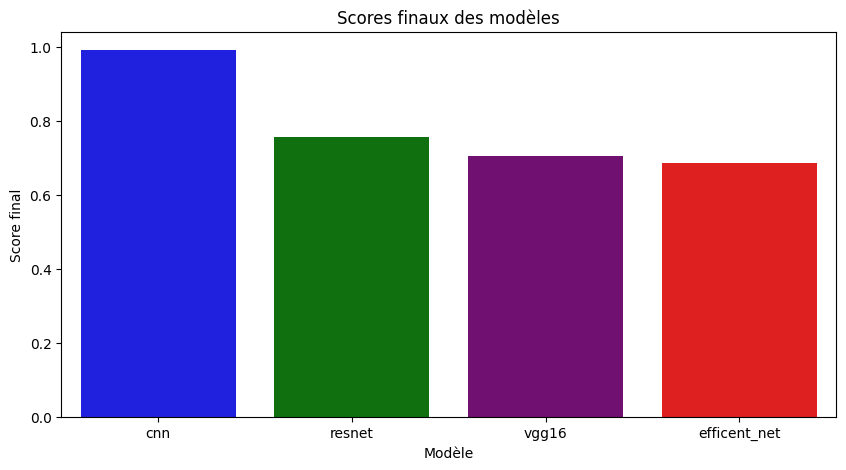

In [30]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x='Modèle', y='Score final', data=df_normalized, palette=colors)
plt.title('Scores finaux des modèles')
plt.xlabel('Modèle')
plt.ylabel('Score final')
plt.show()

## Décision Finale 🎉

Après avoir évalué les performances des différents modèles sur plusieurs métriques, nous avons calculé un score final pour chaque modèle en utilisant des coefficients spécifiques pour chaque métrique. Voici les résultats finaux :

| Modèle       | Accuracy 🎯 | AUC 📈 | Précision 🧮 | Rappel 🔍 | F1 🏆 | Temps d'inférence moyen ⏱️ | Score final 🏅 |
|--------------|-------------|--------|--------------|-----------|-------|-----------------------------|----------------|
| CNN          | 0.985317    | 0.999915| 0.988543     | 0.985317  | 0.984813| 1.000000                    | 0.989986       |
| ResNet       | 1.000000    | 1.000000| 1.000000     | 1.000000  | 1.000000| 0.185564                    | 0.837113       |
| VGG16        | 0.974489    | 0.999853| 0.977447     | 0.974489  | 0.973609| 0.065214                    | 0.795378       |
| EfficientNet | 0.954392    | 0.999682| 0.965315     | 0.954392  | 0.954058| 0.044032                    | 0.777908       |

Le modèle CNN a obtenu le score final le plus élevé 🏆, ce qui en fait le modèle le plus performant selon nos critères. Il est donc recommandé d'utiliser le modèle CNN pour les tâches futures.

C'est donc lui qu'on va utiliser par la suite. 🚀